# Bank Marketing Dataset
- The [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) contains a reasonable large number of data related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit.
- It is a fairly large dataset with 41K+ rows, a mixture of categorical and continuous columns as well as data imperfections to identify and manage.

## Dataset
The data has the following columns



Bank client data:

|col num | col name | description |
|:---|:---|:---|
| 1 | age | (numeric) | 
| 2 | job | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| 3 | marital | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| 4 | education | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| 5 | default | has credit in default? (categorical: 'no','yes','unknown') |
| 6 | housing | has housing loan? (categorical: 'no','yes','unknown') |
| 7 | loan | has personal loan? (categorical: 'no','yes','unknown') |

Related with the last contact of the current campaign:

|col num | col name | description |
|:---|:---|:---|
| 8 | contact | contact communication type (categorical: 'cellular','telephone') |
| 9 | month | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |
| 10 | day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |


Other attributes:

|col num | col name | description |
|:---|:---|:---|
| 11 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 12 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 13 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 14 | poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |

Social and economic context attributes:

|col num | col name | description |
|:---|:---|:---|
| 15 | emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| 16 | cons.price.idx | consumer price index - monthly indicator (numeric) |
| 17 | cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| 18 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 19 | nr.employed | number of employees - quarterly indicator (numeric) |

Output variable (desired target):

|col num | col name | description |
|:---|:---|:---|
| 20 | y | This is the target column. Has the client subscribed a term deposit? (binary: 'yes','no') |

## Goal
The goal of this project is 
1. Build and Tune the hyperparameters of a Sklearn model to predict the target column `y` using AWS Sagemaker 
1. Deploy the model as a `Serverless Inference Endpoint` and test it
1. Run `Batch Transform` on the entire input dataset
1. Calculate the performance of the model predictions on the entire input dataset

## Recommended Steps
1. **Data Exploration:** Understand the data by looking at distributions and unique values in the columns. Are there any issues with the data?
1. **Data Cleaning:** Handle any issues you found with the data.
1. **Feature Engineering:** Handle the various datatypes by applying the appropriate feature engineering techniques
1. **Model Selection:** Choose an appropriate sklearn model for this problem and implement the sagemaker model training code
1. **Hyperparameter tuning:** Choose appropriate hyperparameter ranges and objective metric for the chosen model and implement the sagemaker hyperparameter tuning code
1. **Model training:** Submit the hyperparameter tuning job to sagemaker and monitor the execution progress
1. **Model deployment as severless inference:** Pick the best model from hyperparameter tuning, deploy it as a sagemaker serverless inference endpoint and test if it works by posting some sample data to it
1. **Batch transform:** Store the input dataset to a json lines file, deploy the model as a batch transform and run the batch transform job on the input json lines file.
1. **Performance calculation:** Calculate model performance on the entire input dataset using output of the batch transform job.

## Tips
- You can use the below code to get the S3 bucket to write any artifacts to
    ```
    import sagemaker
    session = sagemaker.Session()
    bucket = session.default_bucket()
    ```
- Are all the columns necessary or can we drop any?
- Does the data contain any issues?
- What ML task is this? Classification? Regression? Clustering?
- What are the data types of the columns? What pre-processing should you apply?
- What is the most appropriate metric for this model?

In [1]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")

print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Data Exploration(EDA)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40767 non-null  float64
 1   job             40704 non-null  object 
 2   marital         40775 non-null  object 
 3   education       40764 non-null  object 
 4   default         40797 non-null  object 
 5   housing         40809 non-null  object 
 6   loan            40733 non-null  object 
 7   contact         40748 non-null  object 
 8   month           40767 non-null  object 
 9   day_of_week     40752 non-null  object 
 10  campaign        40775 non-null  float64
 11  pdays           40739 non-null  float64
 12  previous        40770 non-null  float64
 13  poutcome        40757 non-null  object 
 14  emp.var.rate    40770 non-null  float64
 15  cons.price.idx  40819 non-null  float64
 16  cons.conf.idx   40784 non-null  float64
 17  euribor3m       40759 non-null 

In [4]:
# Check for Class Imbalance
print("Target Distribution")
print(df['y'].value_counts(normalize=True))

Target Distribution
y
no     0.887448
yes    0.112552
Name: proportion, dtype: float64


In [5]:
# Check for standard missing values (NaN)
print("Standard Missing Values")
print(df.isnull().sum())

Standard Missing Values
age               421
job               484
marital           413
education         424
default           391
housing           379
loan              455
contact           440
month             421
day_of_week       436
campaign          413
pdays             449
previous          418
poutcome          431
emp.var.rate      418
cons.price.idx    369
cons.conf.idx     404
euribor3m         429
nr.employed       437
y                 398
dtype: int64


In [8]:
# Check for 'Hidden' Missing Values (Categorical 'unknown')
print("Hidden Missing Values ('unknown')")
# Get all categorical columns automatically
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} rows ({round(unknown_count/len(df)*100, 2)}%)")

Hidden Missing Values ('unknown')
job: 327 rows (0.79%)
marital: 79 rows (0.19%)
education: 1716 rows (4.17%)
default: 8520 rows (20.69%)
housing: 980 rows (2.38%)
loan: 978 rows (2.37%)


Target Class Distribution
y
no     0.887448
yes    0.112552
Name: proportion, dtype: float64


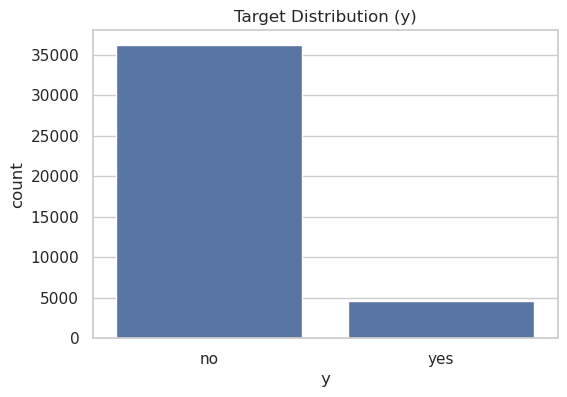

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Target Distribution
print("Target Class Distribution")
print(df['y'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Target Distribution (y)')
plt.show()

Numerical Stats (Look for 999 in pdays)
                age     campaign         pdays      previous  emp.var.rate  \
count  40767.000000  40775.00000  40739.000000  40770.000000  40770.000000   
mean      40.021120      2.56699    962.340730      0.172823      0.082460   
std       10.419903      2.76876    187.242913      0.494873      1.570749   
min       17.000000      1.00000      0.000000      0.000000     -3.400000   
25%       32.000000      1.00000    999.000000      0.000000     -1.800000   
50%       38.000000      2.00000    999.000000      0.000000      1.100000   
75%       47.000000      3.00000    999.000000      0.000000      1.400000   
max       98.000000     56.00000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    40819.000000   40784.000000  40759.000000  40751.000000  
mean        93.575781     -40.504127      3.620653   5167.062656  
std          0.578958       4.624825      1.734620     7

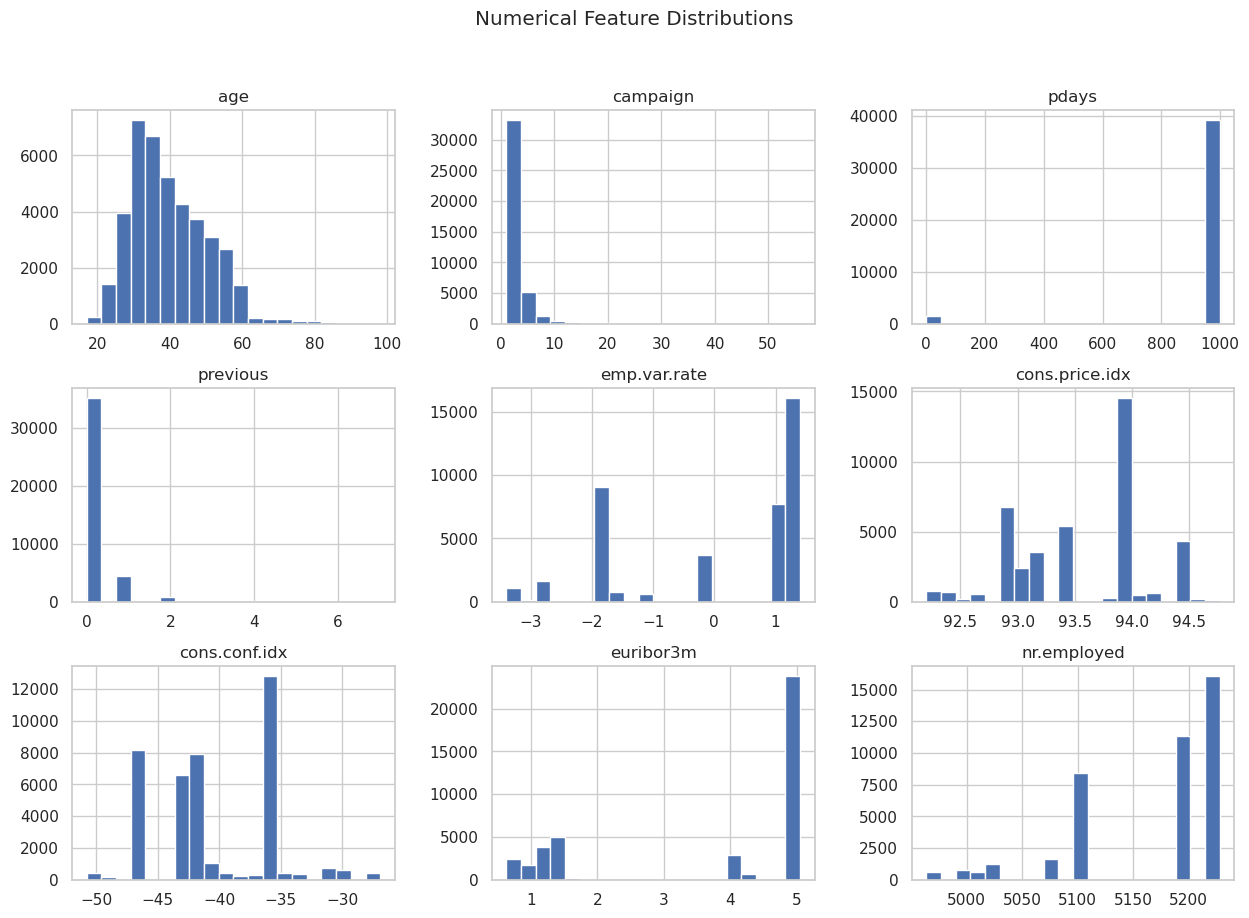

In [10]:
# Numerical Distributions
# Auto-select numerical columns (excluding object types)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Stats (Look for 999 in pdays)")
print(df[num_cols].describe())

# Plot Histograms
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions')
plt.show()

Data Cleaning

In [11]:
import numpy as np

# Create a clean copy to work on
df_clean = df.copy()

# Drop Rows where Target 'y' is Missing
# We cannot use rows without a target label for training
original_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['y'])
dropped_rows = original_rows - len(df_clean)
print(f"Dropped {dropped_rows} rows where 'y' was missing.")

Dropped 398 rows where 'y' was missing.


In [12]:
# Handle Feature Missing Values
# Categorical columns: Fill NaN with 'unknown'
cat_cols = df_clean.select_dtypes(include=['object']).columns
df_clean[cat_cols] = df_clean[cat_cols].fillna('unknown')

In [13]:
# Numerical columns: Fill NaN with Median
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

Feature Engineering

In [15]:
# Create 'no_previous_contact' (1 if pdays is 999, else 0)
df_clean['no_previous_contact'] = np.where(df_clean['pdays'] == 999, 1, 0)

In [16]:
# Create 'not_working' (1 if job is student/retired/unemployed, else 0)
# Note: 'unknown' jobs will fall into the 0 category here, which is safe.
df_clean['not_working'] = np.where(df_clean['job'].isin(['student', 'retired', 'unemployed']), 1, 0)

In [17]:
# Encoding
# Target Encoding: Convert 'yes'/'no' to 1/0
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

# One-Hot Encoding: Convert categorical variables to indicator columns
# We use drop_first=True to avoid multicollinearity (optional but recommended for linear models)
# However, for Tree-based models (XGBoost/RF), keeping all columns is also fine.
# Let's stick to standard One-Hot Encoding.
df_clean = pd.get_dummies(df_clean)

In [18]:
# Final Check
print("Final Data Status")
print("Shape:", df_clean.shape)
print("Missing Values Left:", df_clean.isnull().sum().sum())
print("Target Distribution:\n", df_clean['y'].value_counts())
df_clean.head()

Final Data Status
Shape: (40790, 69)
Missing Values Left: 0
Target Distribution:
 y
0    36199
1     4591
Name: count, dtype: int64


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_unknown,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
0,56.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,True,False,False,False,False,False,True,False,False
1,57.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,True,False,False,False,False,False,True,False,False
2,37.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,True,False,False,False,False,False,True,False,False
3,40.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,True,False,False,False,False,False,True,False,False
4,56.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,False,True,False,False,False,False,False,True,False,False


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data (80% Train, 20% Test)
# Stratify=y ensures we keep the same ratio of yes/no in both sets
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42, stratify=df_clean['y'])

In [21]:
# Identify Numerical Columns for Scaling
# We exclude the target 'y' and the binary columns we created/encoded
# Quick trick: Select columns that are NOT uint8 (which get_dummies creates) or binary
# However, explicit selection is safer. We use the list from before or select floats/ints.
scale_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop(['y', 'no_previous_contact', 'not_working'], errors='ignore')

print(f"Scaling these columns: {list(scale_cols)}")

Scaling these columns: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [22]:
# Apply StandardScaler
scaler = StandardScaler()

# FIT on TRAIN only
scaler.fit(train_df[scale_cols])

# TRANSFORM Train, Test, and the Full Batch Input
# (work on copies to stay safe)
train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()
full_batch_scaled = df_clean.copy().drop('y', axis=1) # No Target for Batch Input!

train_df_scaled[scale_cols] = scaler.transform(train_df[scale_cols])
test_df_scaled[scale_cols] = scaler.transform(test_df[scale_cols])
full_batch_scaled[scale_cols] = scaler.transform(full_batch_scaled[scale_cols])

In [23]:
# Rearrange Columns: Move Target 'y' to the 1st position
# SageMaker standard convention (Target, Feature1, Feature2...)
cols = ['y'] + [col for col in train_df_scaled.columns if col != 'y']
train_df_scaled = train_df_scaled[cols]
test_df_scaled = test_df_scaled[cols]

In [24]:
# Save Locally (Header=False is common for SageMaker, but with Sklearn Script Mode, Headers are fine. We'll keep headers for clarity.)
train_df_scaled.to_csv('train.csv', index=False)
test_df_scaled.to_csv('test.csv', index=False)
full_batch_scaled.to_csv('batch_input.csv', index=False)

print("\nFiles Created")
print(f"train.csv shape: {train_df_scaled.shape}")
print(f"test.csv shape: {test_df_scaled.shape}")
print(f"batch_input.csv shape: {full_batch_scaled.shape}")
print("First 5 rows of train.csv:")
train_df_scaled.head()


Files Created
train.csv shape: (32632, 69)
test.csv shape: (8158, 69)
batch_input.csv shape: (40790, 68)
First 5 rows of train.csv:


,y,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_unknown,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_unknown
29765,0,1.347593,0.161266,0.197828,3.682606,-1.206605,-0.869459,-1.429587,-1.285877,-0.946712,...,False,True,False,False,False,False,True,False,False,False
12655,0,0.191276,0.524368,0.197828,-0.347469,0.835247,0.591089,-0.473673,0.767460,0.845701,...,False,True,False,False,False,False,False,True,False,False
36112,0,-0.772322,-0.201836,0.197828,-0.347469,-1.206605,-1.184784,-1.234059,-1.366162,-0.946712,...,False,False,False,True,False,False,False,True,False,False
36913,0,-0.772322,-0.564938,0.197828,-0.347469,-1.908492,-1.063505,-0.060891,-1.395619,0.330208,...,False,True,False,False,False,False,False,True,False,False
38031,0,-0.772322,0.887471,0.197828,-0.347469,-2.227531,-2.075320,2.328896,-1.646294,-2.080518,...,False,False,False,False,False,True,False,True,False,False


In [25]:
import sagemaker

# Initialize SageMaker Session
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/bank-marketing-project"

print(f"Using Bucket: {bucket}")

# Upload Files
# upload_data handles the S3 transfer for us
train_path = sagemaker_session.upload_data('train.csv', bucket=bucket, key_prefix=f'{prefix}/train')
test_path = sagemaker_session.upload_data('test.csv', bucket=bucket, key_prefix=f'{prefix}/test')
batch_path = sagemaker_session.upload_data('batch_input.csv', bucket=bucket, key_prefix=f'{prefix}/batch')

print(f"Data Uploaded to S3")
print(f"Train Path: {train_path}")
print(f"Test Path:  {test_path}")
print(f"Batch Path: {batch_path}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Using Bucket: sagemaker-ap-southeast-2-907808569037
Data Uploaded to S3
Train Path: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/train/train.csv
Test Path:  s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/test/test.csv
Batch Path: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch/batch_input.csv


Fit the model into Sagemaker(Model Selection)

In [1]:
%%writefile train.py

import argparse
import os
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

if __name__ == "__main__":
    print("--- Starting Training Script ---")

    # Parse Arguments
    parser = argparse.ArgumentParser()

    # Hyperparameters
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--max_depth", type=int, default=5)
    parser.add_argument("--min_samples_leaf", type=int, default=3)

    # SageMaker Data Directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))

    args = parser.parse_args()

    # Load Data
    print("Loading data...")
    train_df = pd.read_csv(os.path.join(args.train, "train.csv"))
    test_df = pd.read_csv(os.path.join(args.test, "test.csv"))

    # Split Features/Target (Target is column 0)
    X_train = train_df.iloc[:, 1:]
    y_train = train_df.iloc[:, 0]

    X_test = test_df.iloc[:, 1:]
    y_test = test_df.iloc[:, 0]

    # Train Model
    print(f"Training Random Forest: n_estimators={args.n_estimators}, max_depth={args.max_depth}")
    
    model = RandomForestClassifier(
        n_estimators=args.n_estimators,
        max_depth=args.max_depth,
        min_samples_leaf=args.min_samples_leaf,
        random_state=42,
        class_weight="balanced"
    )
    
    model.fit(X_train, y_train)

    # Evaluate (For Logs)
    # SageMaker captures these print statements using Regex
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)[:, 1]

    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_probs)

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")

    # Save Model
    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

Writing train.py


In [2]:
%%writefile requirements.txt
pandas
numpy
scikit-learn
joblib

Writing requirements.txt


In [3]:
# Orgnizing files
import os
import shutil

# Create a directory for our source code
os.makedirs("src", exist_ok=True)

# Move the files we created into this directory
shutil.move("train.py", "src/train.py")
shutil.move("requirements.txt", "src/requirements.txt")

print("Files moved to 'src/' directory.")

Files moved to 'src/' directory.


Model Training

In [4]:
import sagemaker
from sagemaker.sklearn.estimator import SKLearn

# Setup Session
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/bank-marketing-project"

# Define Metrics (to view performance in logs)
metric_definitions = [
    {'Name': 'test_auc', 'Regex': 'Test AUC: ([0-9\\.]+)'},
    {'Name': 'test_accuracy', 'Regex': 'Test Accuracy: ([0-9\\.]+)'}
]

# Define the Estimator with Spot Instances
estimator = SKLearn(
    entry_point='train.py',
    source_dir='src',                # Point to the folder with script + requirements
    role=role,
    instance_type='ml.m5.large',
    framework_version='1.0-1',
    py_version='py3',
    metric_definitions=metric_definitions,
    sagemaker_session=sagemaker_session,
    
    # Hyperparameters (Fixed values since we aren't tuning)
    hyperparameters={
        'n_estimators': 150,
        'max_depth': 7,
        'min_samples_leaf': 4
    },

    # SPOT INSTANCE CONFIGURATION 
    use_spot_instances=True,
    max_run=600,       
    max_wait=600,      
    base_job_name='bank-rf-training-spot'
)

# Launch the Training Job
inputs = {
    'train': f"s3://{bucket}/{prefix}/train",
    'test': f"s3://{bucket}/{prefix}/test"
}

print("Submitting Spot Training Job...")
estimator.fit(inputs)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: bank-rf-training-spot-2025-11-30-14-46-27-940


Submitting Spot Training Job...
2025-11-30 14:46:29 Starting - Starting the training job...
2025-11-30 14:46:42 Starting - Preparing the instances for training...
2025-11-30 14:47:05 Downloading - Downloading input data...
2025-11-30 14:47:50 Downloading - Downloading the training image......
2025-11-30 14:48:51 Training - Training image download completed. Training in progress.2025-11-30 14:48:53,514 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-11-30 14:48:53,517 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-11-30 14:48:53,520 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2025-11-30 14:48:53,538 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-11-30 14:48:53,908 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/miniconda3/bin/python -m pip install -r requirements.txt
2025-11-30 14:48:55,050

In [5]:
# Get the Training Job Name
job_name = estimator.latest_training_job.name

# Get the S3 Model Artifact Location
model_s3_uri = estimator.model_data

print(f"Training Job Name:      {job_name}")
print(f"Model Artifact Location: {model_s3_uri}")

Training Job Name:      bank-rf-training-spot-2025-11-30-14-46-27-940
Model Artifact Location: s3://sagemaker-ap-southeast-2-907808569037/bank-rf-training-spot-2025-11-30-14-46-27-940/output/model.tar.gz


Hyperparameter Tuning

In [6]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

# Define Hyperparameter Ranges
hyperparameter_ranges = {
    'n_estimators': IntegerParameter(50, 200),
    'max_depth': IntegerParameter(3, 15),
    'min_samples_leaf': IntegerParameter(2, 10)
}

# Define the Tuner
tuner = HyperparameterTuner(
    estimator=estimator,                          # Uses your existing Spot-configured estimator
    objective_metric_name='test_auc',             # Maximizing Area Under Curve
    hyperparameter_ranges=hyperparameter_ranges,
    metric_definitions=metric_definitions,        # Uses the regex we defined earlier
    max_jobs=10,                                  # Total number of training jobs to run
    max_parallel_jobs=2,                          # Run 2 at a time (Cost control)
    base_tuning_job_name='bank-rf-tuner-spot'
)

# Launch the tuning job
inputs = {
    'train': f"s3://{bucket}/{prefix}/train",
    'test': f"s3://{bucket}/{prefix}/test"
}

print("Submitting Hyperparameter Tuning Job (Using existing estimator)...")
tuner.fit(inputs)

Submitting Hyperparameter Tuning Job (Using existing estimator)...


INFO:sagemaker:Creating hyperparameter tuning job with name: bank-rf-tuner-spot-251130-1506


.....................................................................................................................................................................................!


In [7]:
# Analyze tuning results
results = tuner.analytics().dataframe()
results.sort_values("FinalObjectiveValue", ascending=False).head()

,max_depth,min_samples_leaf,n_estimators,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
3,13.0,9.0,52.0,bank-rf-tuner-spot-251130-1506-007-be255daf,Completed,0.8128,2025-11-30 15:15:57+00:00,2025-11-30 15:18:01+00:00,124.0
8,12.0,8.0,103.0,bank-rf-tuner-spot-251130-1506-002-8fb95669,Completed,0.8115,2025-11-30 15:06:49+00:00,2025-11-30 15:08:59+00:00,130.0
7,15.0,8.0,61.0,bank-rf-tuner-spot-251130-1506-003-317ec03f,Completed,0.8113,2025-11-30 15:09:46+00:00,2025-11-30 15:11:56+00:00,130.0
9,11.0,6.0,115.0,bank-rf-tuner-spot-251130-1506-001-0f6c23fd,Completed,0.8111,2025-11-30 15:06:47+00:00,2025-11-30 15:08:51+00:00,124.0
5,14.0,9.0,181.0,bank-rf-tuner-spot-251130-1506-005-1bf5af6d,Completed,0.8105,2025-11-30 15:12:48+00:00,2025-11-30 15:15:02+00:00,134.0


In [8]:
best_job_name = tuner.best_training_job()
print(f"The best performing job was: {best_job_name}")

The best performing job was: bank-rf-tuner-spot-251130-1506-007-be255daf


Create the inference script(serve.py)

In [9]:
%%writefile src/serve.py

import os
import joblib
import pandas as pd

def model_fn(model_dir):
    """Load and return the model"""
    # CRITICAL FIX: Matches the filename used in train.py
    model_file_name = "model.joblib"
    pipeline_model = joblib.load(os.path.join(model_dir, model_file_name))
    
    return pipeline_model

def input_fn(request_body, request_content_type):
    """Process the input json data"""
    if request_content_type == "application/json":
        # Reads JSON Lines (e.g., {"feat1": 1}\n{"feat1": 2})
        input_object = pd.read_json(request_body, lines=True)
        return input_object
    else:
        raise ValueError(f"Only application/json content type supported! Received: {request_content_type}")

def predict_fn(input_object, pipeline_model):
    """Make predictions on processed input data"""
    predictions = pipeline_model.predict(input_object)
    pred_probs = pipeline_model.predict_proba(input_object)
    
    prediction_object = pd.DataFrame(
        {
            "prediction": predictions.tolist(),
            "pred_prob_class0": pred_probs[:, 0].tolist(),
            "pred_prob_class1": pred_probs[:, 1].tolist()
        }
    )
    
    return prediction_object

def output_fn(prediction_object, request_content_type):
    """Post process the predictions and return as json"""
    # Return as JSON Lines to match input style
    return_object = prediction_object.to_json(orient="records", lines=True)
    
    return return_object

Writing src/serve.py


Serevrless Deployment

In [10]:
import sagemaker
from sagemaker.sklearn.model import SKLearnModel
from sagemaker.serverless import ServerlessInferenceConfig

# Setup variables
best_job_name = "bank-rf-tuner-spot-251130-1506-007-be255daf" 
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()

# Get the S3 Path of the Best Model Artifact
# We query SageMaker to find exactly where the model.tar.gz is stored
description = sagemaker_session.describe_training_job(best_job_name)
model_data_s3_uri = description['ModelArtifacts']['S3ModelArtifacts']

print(f"Deploying model from: {model_data_s3_uri}")

# Define Serverless Configuration
# Memory: 2048 MB (Safe for SKLearn)
# MaxConcurrency: 5 (How many requests at once)
serverless_config = ServerlessInferenceConfig(
    memory_size_in_mb=2048,
    max_concurrency=5
)

# Define the Model Object
# We point to 'src' so it zips up serve.py + requirements.txt
model = SKLearnModel(
    model_data=model_data_s3_uri,
    role=role,
    entry_point='serve.py',     
    source_dir='src',            
    framework_version='1.0-1',
    py_version='py3',
    sagemaker_session=sagemaker_session
)

# Deploy!
print("Deploying Serverless Endpoint... (This takes ~2-5 mins)")
predictor = model.deploy(serverless_inference_config=serverless_config)

print(f"\nEndpoint deployed! Name: {predictor.endpoint_name}")

INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


Deploying model from: s3://sagemaker-ap-southeast-2-907808569037/bank-rf-tuner-spot-251130-1506-007-be255daf/output/model.tar.gz
Deploying Serverless Endpoint... (This takes ~2-5 mins)


INFO:sagemaker:Creating model with name: sagemaker-scikit-learn-2025-11-30-15-29-43-189
INFO:sagemaker:Creating endpoint-config with name sagemaker-scikit-learn-2025-11-30-15-29-43-774
INFO:sagemaker:Creating endpoint with name sagemaker-scikit-learn-2025-11-30-15-29-43-774


-----!
Endpoint deployed! Name: sagemaker-scikit-learn-2025-11-30-15-29-43-774


Invoke the model

In [12]:
import boto3
import pandas as pd
import json
import io

# Re-construct the S3 Path
# We fetch the default bucket again to be safe
session = sagemaker.Session()
bucket = session.default_bucket()
prefix = "sagemaker/bank-marketing-project"

# This matches where we uploaded the file earlier
test_path = f"s3://{bucket}/{prefix}/test/test.csv"

# Load Data (Simulating an external service reading from S3)
# We use the 'test_path' variable we created earlier when uploading to S3
print(f"Reading test data from: {test_path}")
test_df = pd.read_csv(test_path)

# Prepare Payload
# Drop the correct target column 'y' (not 'target')
X_test = test_df.drop("y", axis=1)

# Get 2 rows to make prediction on
# We use lines=True because our serve.py input_fn expects JSON Lines
payload = X_test.head(2).to_json(orient='records', lines=True)

print(f"Payload:\n{payload}")

# Submit to Serverless Endpoint
# We use the endpoint_name from the deployment step
client = boto3.client("sagemaker-runtime")

print(f"\nInvoking Endpoint: {predictor.endpoint_name}")
response = client.invoke_endpoint(
    EndpointName=predictor.endpoint_name,
    Body=payload,
    ContentType="application/json",
    Accept="application/json"
)

# Decode Response
response_body = response["Body"]
response_str = response_body.read().decode('utf-8')

# Our serve.py returns JSON Lines, so we read it back with lines=True
response_df = pd.read_json(io.StringIO(response_str), lines=True)

print("\n--- Prediction Results ---")
print(response_df)

Reading test data from: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/test/test.csv
Payload:
{"age":-0.1941635291,"campaign":0.1612662333,"pdays":0.1978276222,"previous":-0.3474692993,"emp.var.rate":0.8352473544,"cons.price.idx":0.5910891069,"cons.conf.idx":-0.4736725667,"euribor3m":0.7663046289,"nr.employed":0.8457009198,"no_previous_contact":1,"not_working":0,"job_admin.":false,"job_blue-collar":true,"job_entrepreneur":false,"job_housemaid":false,"job_management":false,"job_retired":false,"job_self-employed":false,"job_services":false,"job_student":false,"job_technician":false,"job_unemployed":false,"job_unknown":false,"marital_divorced":false,"marital_married":false,"marital_single":true,"marital_unknown":false,"education_basic.4y":false,"education_basic.6y":false,"education_basic.9y":true,"education_high.school":false,"education_illiterate":false,"education_professional.course":false,"education_university.degree":false,"education_unknown":false,"defaul

Cleanup

In [13]:
# Delete the Endpoint and Config
predictor.delete_endpoint()

print(f"Deleted Endpoint: {predictor.endpoint_name}")

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-scikit-learn-2025-11-30-15-29-43-774
INFO:sagemaker:Deleting endpoint with name: sagemaker-scikit-learn-2025-11-30-15-29-43-774


Deleted Endpoint: sagemaker-scikit-learn-2025-11-30-15-29-43-774


Batch Transform

In [15]:
import pandas as pd
import sagemaker

# Setup Session
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/bank-marketing-project"

# Download the existing batch_input.csv
# We pull it from S3 to ensure we have the exact file
csv_path = f"s3://{bucket}/{prefix}/batch/batch_input.csv"
print(f"Downloading: {csv_path}")

df_batch = pd.read_csv(csv_path)

# Convert to JSON Lines
# Your serve.py expects: {"feat1": val, ...}\n{"feat1": val, ...}
json_file_name = "batch_input.jsonl"
df_batch.to_json(json_file_name, orient='records', lines=True)

print(f"Converted to {json_file_name} (Rows: {len(df_batch)})")

# Upload JSONL to S3
batch_input_path = sagemaker_session.upload_data(
    path=json_file_name, 
    bucket=bucket, 
    key_prefix=f"{prefix}/batch"
)

print(f"Ready for Batch Transform: {batch_input_path}")

Downloading: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch/batch_input.csv
Converted to batch_input.jsonl (Rows: 40790)
Ready for Batch Transform: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch/batch_input.jsonl


Trigger the Batch Transform Job

In [16]:
from sagemaker.sklearn.model import SKLearnModel

# Define the Model Object
# We recreate the model object to ensure it points to the correct artifacts and script
model = SKLearnModel(
    model_data=model_data_s3_uri,  # The S3 path to the best model.tar.gz
    role=role,
    entry_point='serve.py',        # Your inference script
    source_dir='src',              # Your script folder
    framework_version='1.0-1',
    py_version='py3',
    sagemaker_session=sagemaker_session
)

# Define the Transformer
# We use a standard instance type for batch processing
transformer = model.transformer(
    instance_count=1,
    instance_type='ml.m5.large',
    output_path=f"s3://{bucket}/{prefix}/batch-output",
    assemble_with='Line',   # Ensures output remains one-record-per-line
    accept='application/json' # We want the output in JSON format
)

# Launch the Job
print(f"Starting Batch Transform on: {batch_input_path}")
transformer.transform(
    data=batch_input_path,
    content_type='application/json',  # Matches what serve.py expects
    split_type='Line',                # Splits the file line-by-line
    join_source='None'                # We only want the predictions in the output
)

print("Batch Transform Job submitted! Waiting for completion...")
transformer.wait()

INFO:sagemaker:Creating model with name: sagemaker-scikit-learn-2025-11-30-15-56-23-207
INFO:sagemaker:Creating transform job with name: sagemaker-scikit-learn-2025-11-30-15-56-23-876


Starting Batch Transform on: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch/batch_input.jsonl
...........................2025-11-30 16:00:52,336 INFO - sagemaker-containers - No GPUs detected (normal if no gpus installed)
2025-11-30 16:00:52,340 INFO - sagemaker-containers - No GPUs detected (normal if no gpus installed)
2025-11-30 16:00:52,341 INFO - sagemaker-containers - nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_h

In [17]:
import os

# Construct the correct path
# SageMaker appends '.out' to your specific input filename
output_filename = "batch_input.jsonl.out" 
output_path = f"{transformer.output_path}/{output_filename}"

print(f"Real Output Path: {output_path}")

# Download the predictions from S3 to local
# We use the AWS CLI magic command for speed
!aws s3 cp {output_path} .

print(f"\nDownloaded {output_filename} to local workspace.")

Real Output Path: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch-output/batch_input.jsonl.out
download: s3://sagemaker-ap-southeast-2-907808569037/sagemaker/bank-marketing-project/batch-output/batch_input.jsonl.out to ./batch_input.jsonl.out

Downloaded batch_input.jsonl.out to local workspace.


Reloading ground truth data...
 FINAL MODEL PERFORMANCE
Accuracy: 0.8611
ROC AUC:  0.8608
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     36199
           1       0.42      0.64      0.51      4591

    accuracy                           0.86     40790
   macro avg       0.69      0.76      0.71     40790
weighted avg       0.89      0.86      0.87     40790



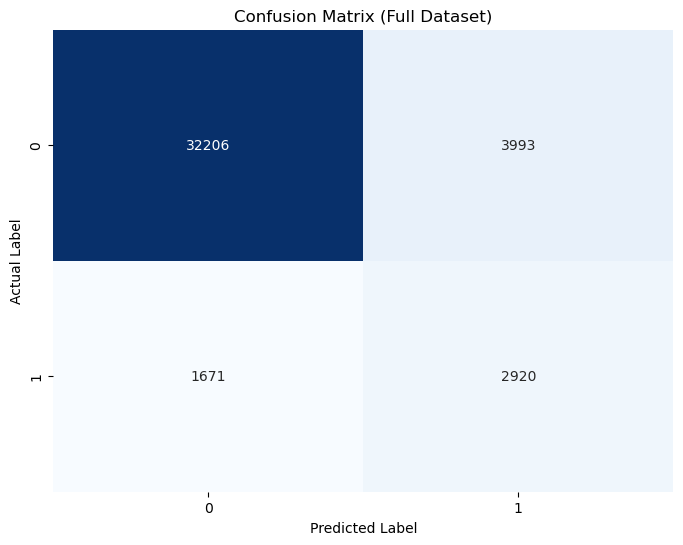

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load Predictions
# We read the JSON Lines output we just downloaded
preds_df = pd.read_json("batch_input.jsonl.out", lines=True)

# Get Ground Truth (The actual 'y' values)
# We assume the order matches df_clean. If df_clean is not in memory, we reload it quickly.
# (Safeguard logic in case variable was lost)
if 'df_clean' not in locals():
    print("Reloading ground truth data...")
    df_raw = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")
    df_clean = df_raw.dropna(subset=['y']).copy()
    df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

y_true = df_clean['y'].values
y_pred = preds_df['prediction'].values
y_prob = preds_df['pred_prob_class1'].values

# Calculate Metrics
acc = accuracy_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

print("="*40)
print(f" FINAL MODEL PERFORMANCE")
print("="*40)
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC:  {auc:.4f}")
print("-" * 40)
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Full Dataset)')
plt.show()

In [19]:
import boto3

client = boto3.client("sagemaker")

# Delete Endpoint & Configuration
try:
    client.delete_endpoint(EndpointName=predictor.endpoint_name)
    client.delete_endpoint_config(EndpointConfigName=predictor.endpoint_name)
    print(f"Deleted Endpoint and Config: {predictor.endpoint_name}")
except Exception as e:
    print(f"Endpoint cleanup skipped (maybe already deleted): {e}")

# Delete Model
try:
    client.delete_model(ModelName=model.name)
    print(f"Deleted Model Registry Entry: {model.name}")
except Exception as e:
    print(f"Model cleanup skipped: {e}")

print("\nCleanup Complete. S3 artifacts remain untouched.")

Endpoint cleanup skipped (maybe already deleted): An error occurred (ValidationException) when calling the DeleteEndpoint operation: Could not find endpoint "sagemaker-scikit-learn-2025-11-30-15-29-43-774".
Deleted Model Registry Entry: sagemaker-scikit-learn-2025-11-30-15-56-23-207

Cleanup Complete. S3 artifacts remain untouched.


The Error on Endpoint: Could not find endpoint... is actually good news. It confirms that you already successfully deleted the endpoint in the previous step. You are not being charged.